In [1]:
import cPickle
import os
import glob
import pandas as pd
from operator import add, itemgetter, truediv
from scipy.signal import savgol_filter
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tableau10 = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
for i in range(len(tableau10)):  
    r, g, b = tableau10[i]  
    tableau10[i] = (r / 255., g / 255., b / 255.)
    
plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.frameon'] = False
plt.rcParams['axes.prop_cycle'] = cycler('color',tableau20)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = .4
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['hist.bins'] = 100
plt.rcParams['legend.fontsize'] = 16

%config InlineBackend.figure_format = 'retina'

In [3]:
emotionD_eng = {}
emotionD_ger = {}

os.chdir(os.getcwd()+'\pickledEmotions'+'\eng')

for f in glob.glob(os.path.join(os.getcwd(), "*.pkl")):
    emotionD_eng[str(f.split('\\')[-1].split('.')[0].split('_')[0])] = cPickle.load(open(f, 'r'))
    
    
os.chdir('..')
os.chdir('..')

os.chdir(os.getcwd()+'\pickledEmotions'+'\ger')

for f in glob.glob(os.path.join(os.getcwd(), "*.pkl")):
    #emotionD_ger[f[110:-8]] = cPickle.load(open(f, 'r'))
    emotionD_ger[str(f.split('\\')[-1].split('.')[0].split('_')[0])] = cPickle.load(open(f, 'r'))
    
os.chdir('..')
os.chdir('..')

In [4]:
year = np.arange(1900, 2001, 1)

In [5]:
emotionD_ger.keys()

['joy', 'sadness', 'disgust', 'anger', 'surprise', 'the', 'fear']

In [6]:
emotionD_eng.keys()

['joy', 'sadness', 'disgust', 'anger', 'surprise', 'the', 'fear']

In [7]:
dfEng = pd.DataFrame()
dfGer = pd.DataFrame()

for key in emotionD_eng.keys():
    dfEng[key] = map(itemgetter(1), emotionD_eng[key][0])
    
for key in emotionD_ger.keys():    
    dfGer[key] = map(itemgetter(1), emotionD_ger[key][0])

In [7]:
#joy = pd.read_csv("disgust.txt",sep = "\t",header=None,names = ['col'])

In [8]:
dfEng.head()

,joy,sadness,disgust,anger,surprise,the,fear
0,8243364,2276332,233332,1198518,839955,68027306,905327
1,8007143,2232908,222680,1158624,792346,69178438,849710
2,8049858,2229044,220628,1162259,787685,70164174,823915
3,7927469,2183227,210877,1116503,808669,68759864,808974
4,8598757,2356266,229428,1211982,861004,76084291,854958


In [9]:
dfGer.head()

,joy,sadness,disgust,anger,surprise,the,fear
0,9053,2428,4710,336919,406,1332739,56754
1,8584,2505,4575,365456,369,1474263,61944
2,10112,2867,5244,405532,612,1580160,68870
3,10104,2870,5727,424013,470,1679979,72036
4,13013,4570,7282,452735,744,1807557,78574


In [10]:
dfEng['tot'] = dfEng.joy + dfEng.sadness + dfEng.disgust + dfEng.anger + dfEng.surprise + dfEng.fear
dfEng['moodScore'] = (dfEng.tot/dfEng.the)/1537  # 1537 is the number of emotional words in the data set
dfEng['zScore'] = (dfEng.moodScore - dfEng.moodScore.mean())/dfEng.moodScore.std()

dfGer['tot'] = dfGer.joy + dfGer.sadness + dfGer.disgust + dfGer.anger + dfGer.surprise + dfGer.fear
dfGer['moodScore'] = (dfGer.tot/dfGer.the)/1537  
dfGer['zScore'] = (dfGer.moodScore - dfGer.moodScore.mean())/dfGer.moodScore.std()

In [11]:
emotionWords_eng, emotionWords_ger = cPickle.load(open('wordNetdicts.pkl', 'r'))

In [12]:
for key in emotionWords_eng.keys():
    if key != 'normalize':
        moodScoreEng = (dfEng[key]/dfEng.the)/len(emotionWords_eng[key])
        dfEng['zScore_'+key] = (moodScoreEng - moodScoreEng.mean())/moodScoreEng.std()
        
        moodScoreGer = (dfGer[key]/dfGer.the)/len(emotionWords_ger[key])
        dfGer['zScore_'+key] = (moodScoreGer - moodScoreGer.mean())/moodScoreGer.std()

In [13]:
dfEng.head()

,joy,sadness,disgust,anger,surprise,the,fear,tot,moodScore,zScore,zScore_joy,zScore_sadness,zScore_disgust,zScore_anger,zScore_surprise,zScore_fear
0,8243364,2276332,233332,1198518,839955,68027306,905327,13696828,0.000131,2.849553,2.772593,2.585843,2.676853,3.469645,0.884506,3.156859
1,8007143,2232908,222680,1158624,792346,69178438,849710,13263411,0.000125,2.104209,2.120919,1.962918,1.975498,2.525702,-0.005623,2.315362
2,8049858,2229044,220628,1162259,787685,70164174,823915,13273389,0.000123,1.906441,1.998850,1.695485,1.728031,2.326583,-0.232065,1.872052
3,7927469,2183227,210877,1116503,808669,68759864,808974,13055719,0.000124,1.960544,2.066429,1.686280,1.470184,1.971582,0.300277,1.890543
4,8598757,2356266,229428,1211982,861004,76084291,854958,14112395,0.000121,1.620222,1.793343,1.274867,1.299320,1.637076,-0.142286,1.457063


In [14]:
dfGer.head()

,joy,sadness,disgust,anger,surprise,the,fear,tot,moodScore,zScore,zScore_joy,zScore_sadness,zScore_disgust,zScore_anger,zScore_surprise,zScore_fear
0,9053,2428,4710,336919,406,1332739,56754,410270,0.000200,0.175758,-0.960667,-0.965025,0.345273,1.072614,-0.985870,-0.702389
1,8584,2505,4575,365456,369,1474263,61944,443433,0.000196,-0.269257,-1.109561,-1.036722,-0.678201,0.678978,-1.070358,-0.883912
2,10112,2867,5244,405532,612,1580160,68870,493237,0.000203,0.447172,-1.021045,-0.969373,-0.166486,1.380218,-0.857341,-0.382649
3,10104,2870,5727,424013,470,1679979,72036,515220,0.000200,0.102777,-1.080128,-1.031344,0.048077,1.039746,-1.024538,-0.608159
4,13013,4570,7282,452735,744,1807557,78574,556918,0.000200,0.192510,-0.898292,-0.552078,1.520160,0.885543,-0.819556,-0.419261


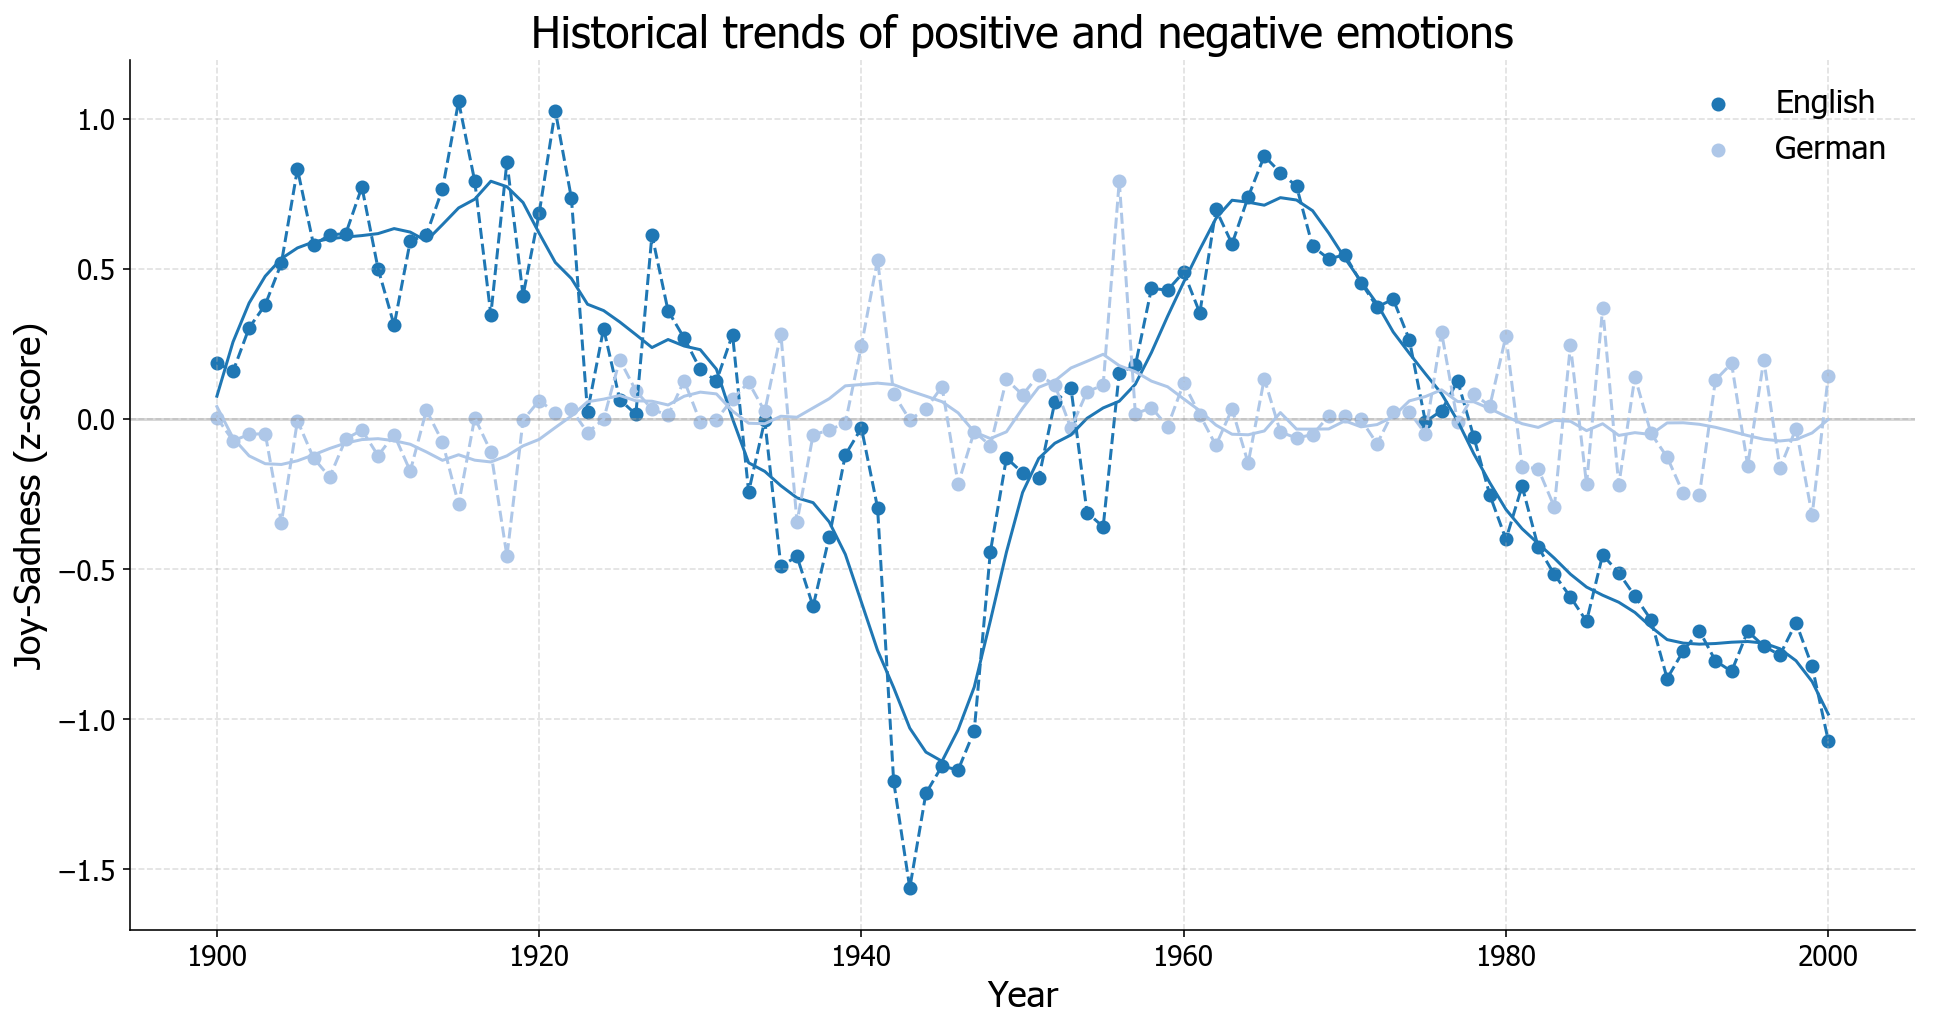

In [15]:
joySadEng = dfEng['zScore_joy'].values - dfEng['zScore_sadness'].values
joySadGer = dfGer['zScore_joy'].values - dfGer['zScore_sadness'].values

plt.scatter(year, joySadEng, label ='English')
plt.plot(year, joySadEng,'--', color=tableau20[0])
plt.plot(year, savgol_filter(joySadEng, 21, 4))
plt.axhline(0, color='gray', alpha=0.3)

plt.scatter(year, joySadGer, label ='German')
plt.plot(year, joySadGer,'--', color=tableau20[1])
plt.plot(year, savgol_filter(joySadGer, 21, 4))

plt.xlabel('Year')
plt.ylabel('Joy-Sadness (z-score)')
plt.title('Historical trends of positive and negative emotions')
plt.legend()
plt.show()

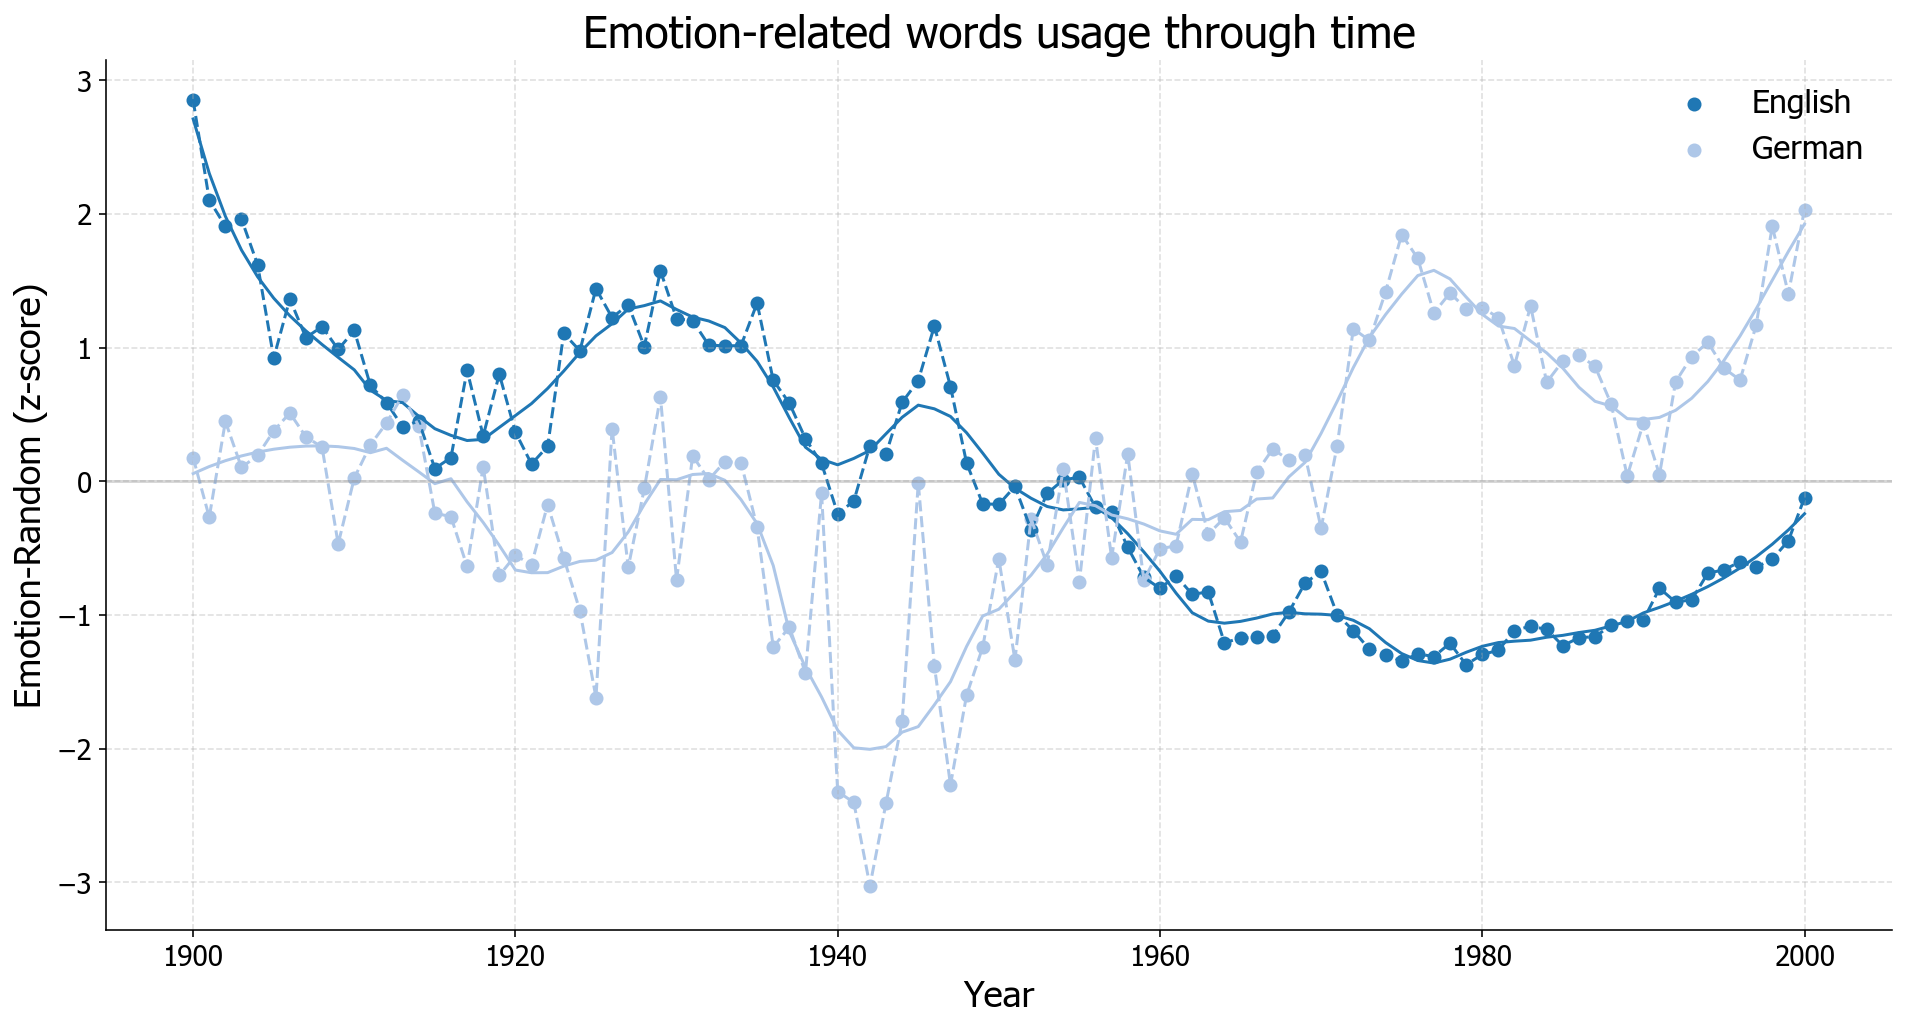

In [16]:
plt.scatter(year, dfEng['zScore'].values, label='English')
plt.plot(year, dfEng['zScore'].values,'--', color=tableau20[0])
plt.plot(year, savgol_filter(dfEng['zScore'].values, 21, 4))

plt.scatter(year, dfGer['zScore'].values, label ='German')
plt.plot(year, dfGer['zScore'].values,'--', color=tableau20[1])
plt.plot(year, savgol_filter(dfGer['zScore'].values, 21, 4))
plt.axhline(0, color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Emotion-Random (z-score)')
plt.title('Emotion-related words usage through time')
plt.legend()
plt.show()

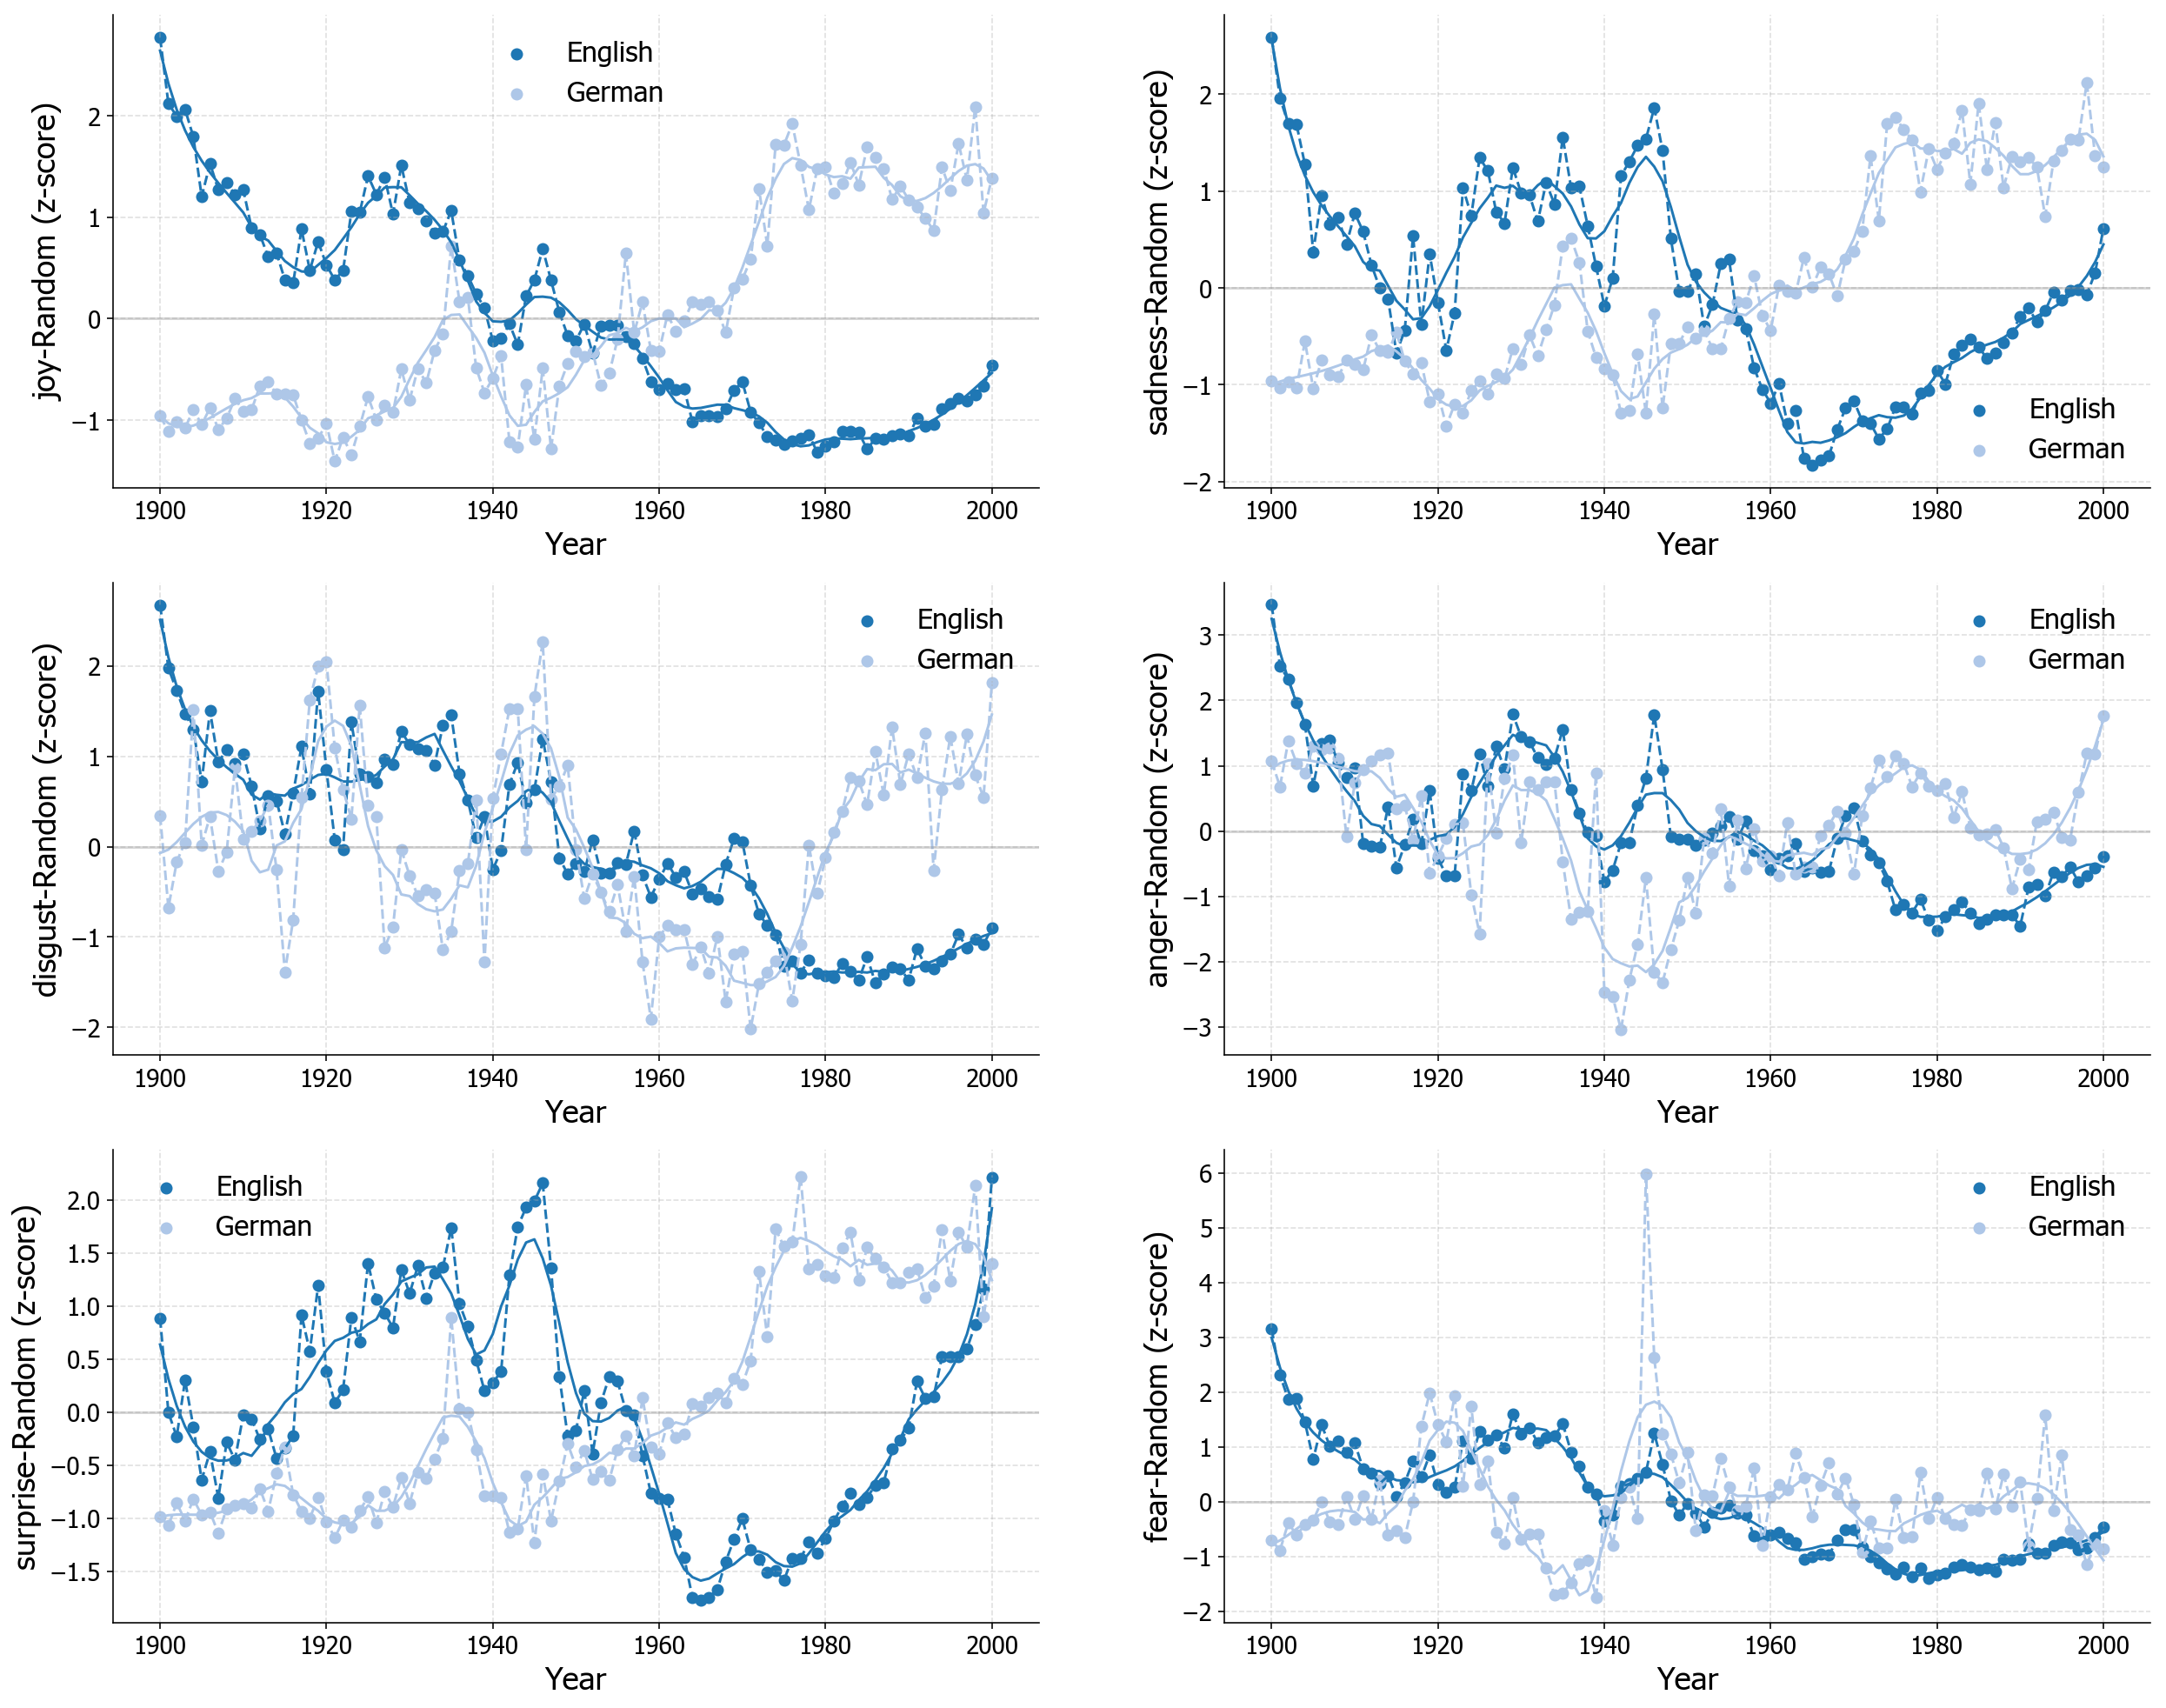

In [17]:
pos=1
plt.figure(figsize=(21,17))
for key in emotionWords_eng.keys():
    if key != 'normalize':
        plt.subplot(3,2,pos)
        plt.scatter(year, dfEng['zScore_'+key].values, label='English')
        plt.plot(year, dfEng['zScore_'+key].values,'--', color=tableau20[0])
        plt.plot(year, savgol_filter(dfEng['zScore_'+key].values, 21, 4))

        plt.scatter(year, dfGer['zScore_'+key].values, label ='German')
        plt.plot(year, dfGer['zScore_'+key].values,'--', color=tableau20[1])
        plt.plot(year, savgol_filter(dfGer['zScore_'+key].values, 21, 4))
        plt.axhline(0, color='gray', alpha=0.3)
        plt.xlabel('Year')
        plt.ylabel(key+'-Random (z-score)')
        #plt.title(key+'-related words usage through time')
        plt.legend()
        pos+=1
plt.show()

## Make it interactive

In [39]:
import mpld3
mpld3.enable_notebook()

In [40]:
from mpld3 import plugins

In [26]:
# from bokeh.plotting import figure, show, output_file

# TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# p = figure(tools=TOOLS)

# p.scatter(year, dfEng['zScore'].values, fill_color=tableau20[0])

# output_file("color_scatter.html", title="color_scatter.py example")

# show(p)  # open a browser

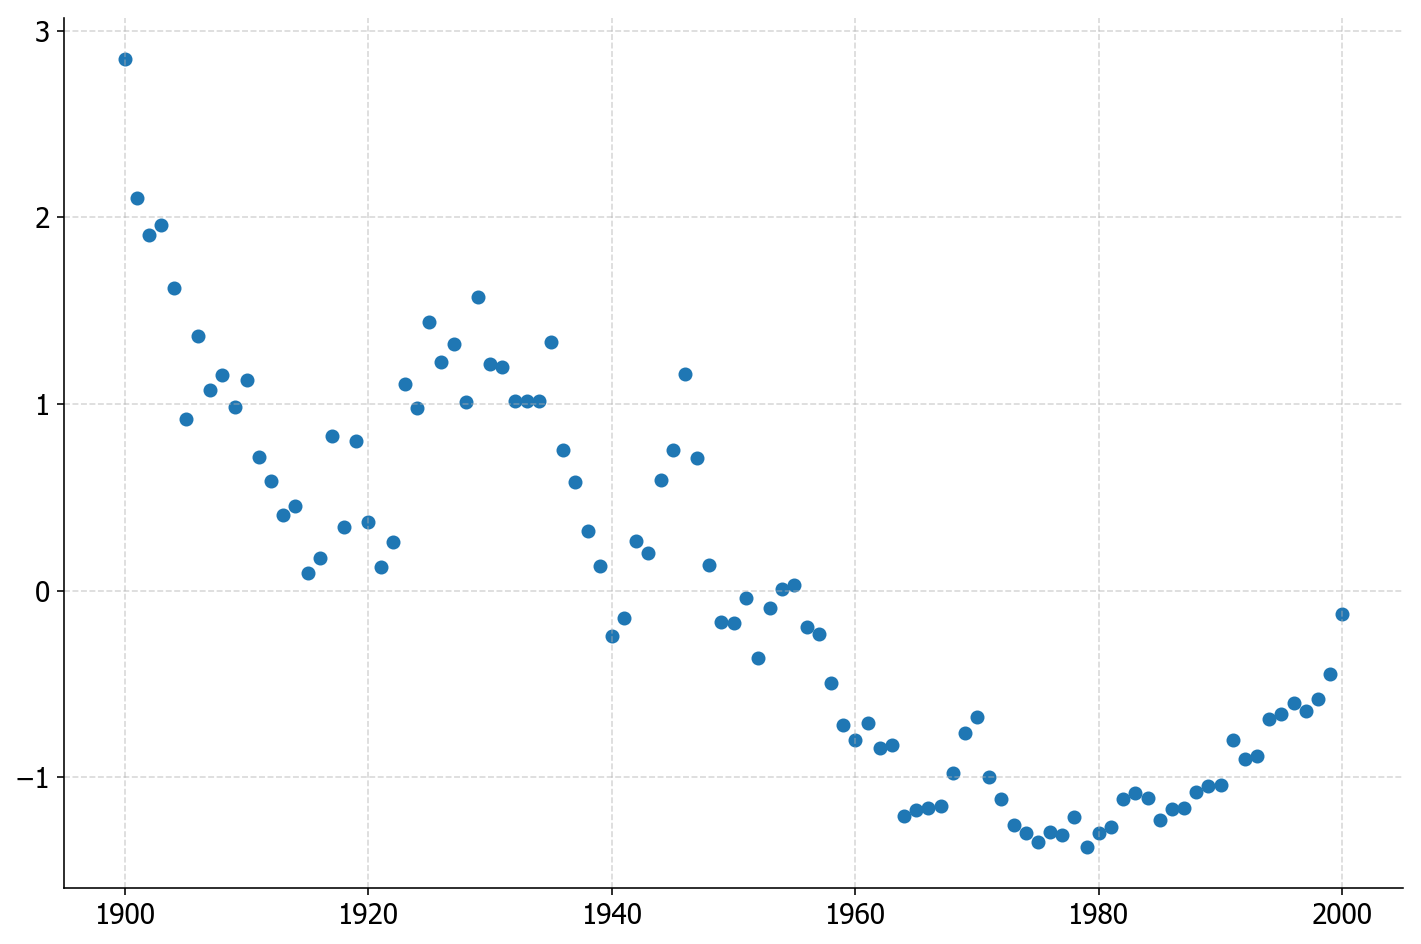

In [47]:
fig, ax = plt.subplots()
points = ax.scatter(year, dfEng['zScore'].values, label='English')

labels = [(year[i], round(j,2)) for i,j in enumerate(dfEng['zScore'].values)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)